In [7]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
import joblib
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer,OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [2]:
dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv'
df = pd.read_csv(dataset_path)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [3]:
X = df.drop(['species'], axis=1)
y = df['species']

In [4]:
numerical_features = [x for x, dtype in zip(X.columns, X.dtypes) if dtype.kind in ['i','f'] ]
categorical_features = [x for x, dtype in zip(X.columns, X.dtypes) if dtype.kind not in ['i','f']]

print('Numerical : ' + str(numerical_features))
print('Categorical : ' + str(categorical_features))

Numerical : ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Categorical : ['island', 'sex']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=667,
                                                    )

In [8]:
Preprocessor = make_column_transformer(
                                        (make_pipeline(
                                        KBinsDiscretizer(n_bins=3)), numerical_features),
    
                                        (make_pipeline(
                                        OneHotEncoder(categories = 'auto', handle_unknown = 'ignore')), categorical_features)
                                        )

In [9]:
scaler = StandardScaler()

classifier = RandomForestClassifier()

In [10]:
model_pipe = Pipeline([
                       ('Preprocessing features', Preprocessor),
                       ('Scaling and standadize data', scaler), 
                       ('Classifier', classifier)
                      ])
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('Preprocessing features',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('kbinsdiscretizer',
                                                                   KBinsDiscretizer(n_bins=3))]),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['island', 'sex'])])),
                ('Scaling and standadize data', StandardScaler()),
                ('Classifier', RandomForestClassifier())])

In [13]:
feat_list = []
imp_list = []
importance = classifier.feature_importances_
feature_importance = dict(zip(X.columns, importance))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    feat_list.append(feature)
    imp_list.append(importance)
    print(f"{feature}: {importance}")

island: 0.16781069665215306
bill_depth_mm: 0.096395673733121
flipper_length_mm: 0.09325759557281944
bill_length_mm: 0.04611702400153411
sex: 0.024365519351133465
body_mass_g: 0.013593563656297922


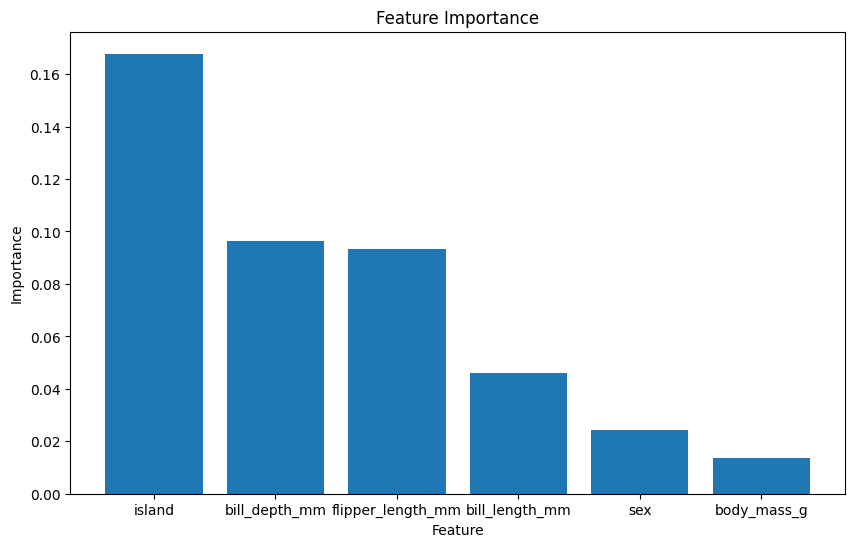

In [20]:
plt.figure(figsize=(10, 6)) 
plt.bar(feat_list, imp_list)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [11]:
print(f'Train Accuracy: {model_pipe.score(X_train, y_train):.3f}')
print(f'Test Accuracy : {model_pipe.score(X_test, y_test):.3f}')

Train Accuracy: 0.996
Test Accuracy : 0.988


In [12]:
from sklearn.model_selection import cross_val_score

cross = cross_val_score(model_pipe,X,y,cv=5)
round(np.mean(cross),2)

0.99

In [23]:
test_pred = model_pipe.predict(df)
test_pred

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'A

In [18]:
joblib.dump(model_pipe,'penguins_pipe.pkl')

['penguins_pipe.pkl']